#Yilun Wang(yilun830@bu.edu) - ASSIGNMENT #4


# convert notebook to html then print as PDF






In [ ]:
!jupyter nbconvert --to html /content/Assignment_04_Yilun_Wang.ipynb


[NbConvertApp] Converting notebook /content/Assignment_04_Yilun_Wang.ipynb to html
[NbConvertApp] Writing 368273 bytes to /content/Assignment_04_Yilun_Wang.html


# Main content:

In [ ]:
%matplotlib inline

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
# import temp1.csv
temp1 = pd.read_csv('https://raw.githubusercontent.com/ChasteloveCNN/ba765-session02/main/temp1.csv')

In [ ]:
# import project tickers.csv
data1 = pd.read_csv('https://raw.githubusercontent.com/ChasteloveCNN/ba765-session02/main/ProjectTickers.csv')

In [ ]:
temp1.head(5)

,gvkey,datadate,fyear,indfmt,consol,popsrc,datafmt,tic,curcd,ceq,csho,ebit,ni,sale,costat,prcc_c
0,1004,20210531,2020,INDL,C,D,STD,AIR,USD,974.4,35.375,65.50,35.80,1651.400,A,36.22
1,1045,20211231,2021,INDL,C,D,STD,AAL,USD,-7340.0,647.728,-5514.00,-1993.00,29882.000,A,17.96
2,1075,20211231,2021,INDL,C,D,STD,PNW,USD,5906.2,112.927,805.31,618.72,3803.835,A,70.59
3,1078,20211231,2021,INDL,C,D,STD,ABT,USD,35802.0,1764.082,8966.00,7071.00,43075.000,A,140.74
4,1161,20211231,2021,INDL,C,D,STD,AMD,USD,7497.0,1207.000,3678.00,3162.00,16434.000,A,143.90


In [ ]:
temp1.isna().sum()

gvkey       0
datadate    0
fyear       0
indfmt      0
consol      0
popsrc      0
datafmt     0
tic         0
curcd       0
ceq         0
csho        0
ebit        0
ni          0
sale        0
costat      0
prcc_c      0
dtype: int64

In [ ]:
data1.head(5)

,Ticker,Name,RetYTD
0,A,Agilent Technologies,-0.2080
1,AA,Alcoa Corp,0.4731
2,AAL,American Airlines Gp,0.0579
3,AAN,Aarons Holdings Company,-0.1327
4,AAON,Aaon Inc,-0.3456


In [ ]:
# rename column
temp1.rename(columns={'tic':'Ticker'}, inplace=True)
temp1.head()

,gvkey,datadate,fyear,indfmt,consol,popsrc,datafmt,Ticker,curcd,ceq,csho,ebit,ni,sale,costat,prcc_c
0,1004,20210531,2020,INDL,C,D,STD,AIR,USD,974.4,35.375,65.50,35.80,1651.400,A,36.22
1,1045,20211231,2021,INDL,C,D,STD,AAL,USD,-7340.0,647.728,-5514.00,-1993.00,29882.000,A,17.96
2,1075,20211231,2021,INDL,C,D,STD,PNW,USD,5906.2,112.927,805.31,618.72,3803.835,A,70.59
3,1078,20211231,2021,INDL,C,D,STD,ABT,USD,35802.0,1764.082,8966.00,7071.00,43075.000,A,140.74
4,1161,20211231,2021,INDL,C,D,STD,AMD,USD,7497.0,1207.000,3678.00,3162.00,16434.000,A,143.90


In [ ]:
# merge two datasets
df = pd.merge(temp1, data1, how='outer', on='Ticker')

In [ ]:
df.head(5)

,gvkey,datadate,fyear,indfmt,consol,popsrc,datafmt,Ticker,curcd,ceq,csho,ebit,ni,sale,costat,prcc_c,Name,RetYTD
0,1004,20210531,2020,INDL,C,D,STD,AIR,USD,974.4,35.375,65.50,35.80,1651.400,A,36.22,AAR Corp,0.2944
1,1045,20211231,2021,INDL,C,D,STD,AAL,USD,-7340.0,647.728,-5514.00,-1993.00,29882.000,A,17.96,American Airlines Gp,0.0579
2,1075,20211231,2021,INDL,C,D,STD,PNW,USD,5906.2,112.927,805.31,618.72,3803.835,A,70.59,Pinnacle West Capital Corp,0.0985
3,1078,20211231,2021,INDL,C,D,STD,ABT,USD,35802.0,1764.082,8966.00,7071.00,43075.000,A,140.74,Abbott Laboratories,-0.1638
4,1161,20211231,2021,INDL,C,D,STD,AMD,USD,7497.0,1207.000,3678.00,3162.00,16434.000,A,143.90,Adv Micro Devices,-0.3533


## Create ratios

In [ ]:
df['Book/Price'] = df['ceq'] / (df['prcc_c'] * df['csho'])
df['E/P'] = df['ni'] / (df['prcc_c'] * df['csho'])
df['EBIT/P'] = df['ebit'] / (df['prcc_c'] * df['csho'])
df['SALE/P'] = df['sale'] / (df['prcc_c'] * df['csho'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1886 entries, 0 to 1885
Data columns (total 22 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   gvkey       1886 non-null   int64  
 1   datadate    1886 non-null   int64  
 2   fyear       1886 non-null   int64  
 3   indfmt      1886 non-null   object 
 4   consol      1886 non-null   object 
 5   popsrc      1886 non-null   object 
 6   datafmt     1886 non-null   object 
 7   Ticker      1886 non-null   object 
 8   curcd       1886 non-null   object 
 9   ceq         1886 non-null   float64
 10  csho        1886 non-null   float64
 11  ebit        1886 non-null   float64
 12  ni          1886 non-null   float64
 13  sale        1886 non-null   float64
 14  costat      1886 non-null   object 
 15  prcc_c      1886 non-null   float64
 16  Name        1886 non-null   object 
 17  RetYTD      1886 non-null   float64
 18  Book/Price  1886 non-null   float64
 19  E/P         1886 non-null  

In [ ]:
# check null value
df.isna().sum()

gvkey         0
datadate      0
fyear         0
indfmt        0
consol        0
popsrc        0
datafmt       0
Ticker        0
curcd         0
ceq           0
csho          0
ebit          0
ni            0
sale          0
costat        0
prcc_c        0
Name          0
RetYTD        0
Book/Price    0
E/P           0
EBIT/P        0
SALE/P        0
dtype: int64

# Winsorize

In [ ]:
#import winsorize
from scipy.stats.mstats import winsorize

### winsorize for Book/Price:

In [ ]:
# winsorize
df['B/P_win'] = winsorize(df['Book/Price'], (0.01,0.01))
df['B/P_win'].describe()

count    1886.000000
mean        0.418525
std         0.357610
min        -0.337273
25%         0.161112
50%         0.337004
75%         0.613868
max         1.677414
Name: B/P_win, dtype: float64

### winsorize for E/P:

In [ ]:
# winsorize
df['E/P_win'] = winsorize(df['E/P'], (0.01,0.01))
df['E/P_win'].describe()

count    1886.000000
mean        0.028863
std         0.104543
min        -0.521213
25%         0.008113
50%         0.036704
75%         0.076322
max         0.279700
Name: E/P_win, dtype: float64

### winsorize for EBIT/P:

In [ ]:
# winsorize
df['EBIT/P_win'] = winsorize(df['EBIT/P'], (0.01,0.01))
df['EBIT/P_win'].describe()

count    1886.000000
mean        0.061663
std         0.111000
min        -0.378436
25%         0.019641
50%         0.056821
75%         0.113822
max         0.415467
Name: EBIT/P_win, dtype: float64

### winsorize for Sale/P:

In [ ]:
# winsorize
df['SALE/P_win'] = winsorize(df['SALE/P'], (0.01,0.01))
df['SALE/P_win'].describe()

count    1886.000000
mean        0.715741
std         0.984946
min         0.000060
25%         0.176223
50%         0.350729
75%         0.814565
max         6.119348
Name: SALE/P_win, dtype: float64

# Save variables to new csv

In [ ]:
  # save six columns to new dataframe
  new=pd.DataFrame({'Ticker': df['Ticker'],
                    'Book/Price': df['B/P_win'],
                    'E/P': df['E/P_win'],
                    'EBIT/P': df['EBIT/P_win'],
                    'SALES/P': df['SALE/P_win'],
                    'RetYTD': df['RetYTD']
                    })
  new.head(5)

,Ticker,Book/Price,E/P,EBIT/P,SALES/P,RetYTD
0,AIR,0.760488,0.027941,0.051121,1.288865,0.2944
1,AAL,-0.337273,-0.171320,-0.378436,2.568684,0.0579
2,PNW,0.740913,0.077616,0.101023,0.477178,0.0985
3,ABT,0.144202,0.028480,0.036113,0.173496,-0.1638
4,AMD,0.043164,0.018205,0.021176,0.094618,-0.3533


In [ ]:
# dataframe to csv
new.to_csv("Assign4.csv")

# Examine the correlations between Book/Price, E/P, EBIT/P, SALES/P, and RetYTD.

In [ ]:
new.corr()

,Book/Price,E/P,EBIT/P,SALES/P,RetYTD
Book/Price,1.000000,0.221258,0.275611,0.244706,0.239582
E/P,0.221258,1.000000,0.776840,0.040736,0.065767
EBIT/P,0.275611,0.776840,1.000000,0.242110,0.130149
SALES/P,0.244706,0.040736,0.242110,1.000000,0.155575
RetYTD,0.239582,0.065767,0.130149,0.155575,1.000000


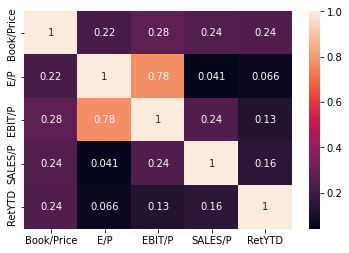

In [ ]:
sns.heatmap(new.corr(), annot=True)
plt.show()

We can see the four variables(B/P, E/P, EBIT/P, SALES/P) have positive correlaton with RetYTD. So those four variables have positive effect on the stock return from January 1, 2022 to January 14, 2022.

# Estimate 4 linear regression models (using StatsModel API)

In [ ]:
new['constant'] = 1

### RetYTD = a + b1*Book/P + e

In [ ]:
X = new[['constant','Book/Price']]
y = new['RetYTD']
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 RetYTD   R-squared:                       0.057
Model:                            OLS   Adj. R-squared:                  0.057
Method:                 Least Squares   F-statistic:                     114.7
Date:                Fri, 22 Apr 2022   Prob (F-statistic):           4.99e-26
Time:                        01:29:56   Log-Likelihood:                 42.030
No. Observations:                1886   AIC:                            -80.06
Df Residuals:                    1884   BIC:                            -68.98
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
constant      -0.1318      0.008    -15.707      0.0

### RetYTD = a + b2*E/P + e

In [ ]:
X = new[['constant','E/P']]
y = new['RetYTD']
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 RetYTD   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     8.184
Date:                Fri, 22 Apr 2022   Prob (F-statistic):            0.00427
Time:                        01:29:56   Log-Likelihood:                -9.6261
No. Observations:                1886   AIC:                             23.25
Df Residuals:                    1884   BIC:                             34.34
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
constant      -0.0679      0.006    -11.683      0.0

### RetYTD = a + b3*EBIT/P + e

In [ ]:
X = new[['constant','EBIT/P']]
y = new['RetYTD']
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 RetYTD   R-squared:                       0.017
Model:                            OLS   Adj. R-squared:                  0.016
Method:                 Least Squares   F-statistic:                     32.46
Date:                Fri, 22 Apr 2022   Prob (F-statistic):           1.41e-08
Time:                        01:29:56   Log-Likelihood:                 2.3964
No. Observations:                1886   AIC:                           -0.7929
Df Residuals:                    1884   BIC:                             10.29
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
constant      -0.0811      0.006    -12.734      0.0

### RetYTD = a + b4*SALES/P + e

In [ ]:
X = new[['constant','SALES/P']]
y = new['RetYTD']
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 RetYTD   R-squared:                       0.024
Model:                            OLS   Adj. R-squared:                  0.024
Method:                 Least Squares   F-statistic:                     46.73
Date:                Fri, 22 Apr 2022   Prob (F-statistic):           1.10e-11
Time:                        01:29:56   Log-Likelihood:                 9.3911
No. Observations:                1886   AIC:                            -14.78
Df Residuals:                    1884   BIC:                            -3.698
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
constant      -0.0910      0.007    -13.277      0.0

From four regressions above, we can see:

*   R2 are 0.057, 0.004, 0.017, 0.024. 
*   Adj.R2 are 0.057, 0.004, 0.016, 0.024.
*   b1=0.1633, b2=0.1534, b3=0.2859, b4=0.0385.
*   T-stats are 10.711, 2.861, 5.698 and 6.836.





We can conclude that the R-square and Adj.R-square of four regressions are not high enough, all below 0.06, which means the extent of interpretation of four regressions are not good.

The four b values are all positive, which means the four variables all have positive relationship with RetYTD(stock return). Particularly, b3 is the highest one, which means EBIP/Price has the most positive relationship with stock return.

Finally, because all of the four t-stats are higher than 2.58(according to 99% significant level), so the four regression's significant level are bigger than 99%.